## December 2020 CLICC Data Project
by Julia Wood

### Focus: How did students and staff utilize CLICC's lending services this quarter (Sep - Dec 2020)?
    a. What is the demographic breakdown between undergrads, grads, faculty, and staff for checking out equipment?
    b. How do items vary in popularity amongst the above groups? 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv("JIRA Help Desk 2020-12-09T13_36_07-0800.csv")
df2 = pd.read_csv("JIRA Help Desk 2020-12-09T13_36_25-0800.csv")

In [3]:
print(df1.shape)
print(df2.shape)

(433, 544)
(665, 536)


In [4]:
pd.set_option('display.max_columns', None)
df1.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,Project url,Priority,Resolution,Assignee,Reporter,Creator,Created,Updated,Last Viewed,Resolved,Due Date,Votes,Labels,Labels.1,Labels.2,Labels.3,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Original Estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Security Level,Outward issue link (Blocks),Outward issue link (Issue split),Outward issue link (Relates),Attachment,Attachment.1,Attachment.2,Attachment.3,Attachment.4,Attachment.5,Attachment.6,Attachment.7,Attachment.8,Attachment.9,Attachment.10,Attachment.11,Attachment.12,Custom field (# of Positions Available),10 days of customer inactivity,10 days of customer inactivity simplified,Custom field (1st Reviewing Archivist),Custom field (2nd Assignee),Custom field (2nd Reviewing Archivist),"Custom field (3DS, 3DP, Laser Etching)",Custom field (3rd Reviewing Archivist),Custom field (4th Reviewing Archivist),5 days of customer inactivity,5 days of customer inactivity simplified,Custom field (670 Additional Sources (D)),Custom field (9 Digit Course SRS Number),Custom field (Academic Title),Custom field (Accession Number),Custom field (Accession Title),Custom field (Account End Date),Custom field (Account Request Type),Custom field (Account Start Date),Custom field (Account/Fund/Job Nickname),Custom field (Activity Start),Custom field (Actual Accession Hours),Custom field (Actual Processing Hours),Custom field (Additional Interview Participants),Custom field (Additional Resource(s)),Custom field (Advertising To Be Included),Custom field (Affiliated Library Unit),Custom field (Affiliation),Custom field (Appointee's Name),Custom field (Appointment Availability),Custom field (Approved by),Custom field (Approximate Dimensions),Custom field (Are other users experiencing the same issue?),Custom field (Are you employed by UCLA?),Custom field (Are you on campus?),Custom field (Assigned Laptop/iPad Equipment),Custom field (Attendees),Custom field (Available to work during intersessions and holidays?),Custom field (Available to work during summer vacation?),Custom field (Background Check Required?),Custom field (Bar Code),Custom field (Barcode Type),Custom field (Barcodes for Laptop/iPad and Charger),Custom field (Begin GA Funding Effective Date),Custom field (Begin Work-Study Effective Date),Custom field (Box Number),Custom field (Brief Description of Resource),Custom field (Brief summary of issue),Custom field (Browser),Custom field (Browser Options),Custom field (Building),Custom field (Building Services Request Type),Custom field (CLICC Additional Consultant),Custom field (CLICC Additional Printer Paper),Custom field (CLICC Date & Time Picker),Custom field (CLICC Desktop Problems),Custom field (CLICC Laptop Number 2019),Custom field (CLICC Laptop Problems),Custom field (CLICC Laptop | Operating System),Custom field (CLICC Locations),Custom field (CLICC Print Release Station Problems),Custom field (CLICC Report Issue),Custom field (CLICC or ITS),Custom field (CLICC: Software),Custom field (Campus Address),Custom field (Can you commit to work more than two quarters?),Custom field (Cataloger),Custom field (Category),Custom field (Change Percent To),Custom field (Change in Account/Fund?),Custom field (Class/Lab Name),Cleaning - SLA,Cleaning - SLA simplified,Custom field (Clone Version),Custom field (Collection Abstract),Custom field (Collection File Pathway),Custom field (Collection Outcome),Custom field (Collection Steward),Custom field (Collection Summary),Custom field (Comments),Custom field (Condition),Custom field (Confluence Documentation),Custom field (Contact Information),Custom field (Contacted Own Department for Device),Custom field (Container Summary),Custom field (Course Department),Custom field (Course Title),Custom field (Curator),Custom field (Curatorial Proposal Form),Cust

### Checking to see that "Custom field (UID Number)" is a good field for individual identification, and it is because there are no null values. :)

In [5]:
df1["Custom field (UID Number)"].isnull().sum() 

0

### Picking the columns I want to include in my dataset, because there are ove 500 columns in the dataframes above. 

In [6]:
cols = ["Creator",  
 "Custom field (UID Number)", 
 "Custom field (UCLA Staff/Faculty Status (Non-Surveyed))", 
 "Custom field (UCLA Student Status (Non-Surveyed))", 
 "Custom field (Faculty/Instructor Requested Equipment)" , 
 "Custom field (Assigned Laptop/iPad Equipment)", 
 "Custom field (Getting a MiFi Hotspot?)", 
 "Custom field (Undergraduate Equipment)", 
       "Custom field (Graduate Equipment)"]





In [7]:
df1.loc[:, cols]

,Creator,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Custom field (UCLA Student Status (Non-Surveyed)),Custom field (Faculty/Instructor Requested Equipment),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Custom field (Undergraduate Equipment),Custom field (Graduate Equipment)
0,utsavm9@g.ucla.edu,805127226,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
1,mariahlara4@g.ucla.edu,105527195,NaN,Graduate,NaN,ITS iPad,No,NaN,iPad
2,ariyanaash@gmail.com,905544515,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
3,sarwari1999@g.ucla.edu,304764960,NaN,Undergraduate,NaN,ITS Windows Laptop,No,MacBook,NaN
4,Kgray3@ucla.edu,605507128,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
...,...,...,...,...,...,...,...,...,...
428,kkchen@g.ucla.edu,205024368,NaN,Graduate,NaN,ITS Windows Laptop,No,NaN,NaN
429,vvillaga@ucla.edu,105358593,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
430,ROSEBERRY8016@ROCKETMAIL.COM,105382786,NaN,Undergraduate,NaN,CLICC HP Laptop,No,Windows laptop,NaN
431,angeliki.asprouli@gmail.com,005647080,Faculty/Instructor,NaN,Macbook,CLICC MacBook,No,NaN,NaN


### Making my final dataframe with the designated columns from both of the dataframes Jack sent me from CLICC checkouts from Sep-Dec 2020. 

In [8]:
df = pd.concat([df1.loc[:, cols], df2.loc[:, cols]])

In [9]:
df

,Creator,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Custom field (UCLA Student Status (Non-Surveyed)),Custom field (Faculty/Instructor Requested Equipment),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Custom field (Undergraduate Equipment),Custom field (Graduate Equipment)
0,utsavm9@g.ucla.edu,805127226,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
1,mariahlara4@g.ucla.edu,105527195,NaN,Graduate,NaN,ITS iPad,No,NaN,iPad
2,ariyanaash@gmail.com,905544515,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
3,sarwari1999@g.ucla.edu,304764960,NaN,Undergraduate,NaN,ITS Windows Laptop,No,MacBook,NaN
4,Kgray3@ucla.edu,605507128,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
...,...,...,...,...,...,...,...,...,...
660,Ceshajames@g.ucla.edu,205527374,NaN,Graduate,NaN,NaN,Yes,NaN,Other
661,fcastro161@g.ucla.edu,705393503,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
662,lezellegadosedu@gmail.com,705011306,NaN,Undergraduate,NaN,CLICC MacBook,No,MacBook,NaN
663,calebalexander@alum.calarts.edu,405498931,NaN,Graduate,NaN,ITS MacBook,No,NaN,Other


In [10]:
print(df['Custom field (Undergraduate Equipment)'].isna().sum())
print(df['Custom field (Graduate Equipment)'].isna().sum())

487
657


In [11]:
sum(df.groupby('Custom field (UID Number)').count().iloc[:, 0] > 1)
# 45 people have more than one ticket

45

# Creating a students dataframe to look out how undergraduates and graduate students used CLICC during the Fall 2020 academic quarter.

In [12]:
students = df[df["Custom field (UCLA Staff/Faculty Status (Non-Surveyed))"].isna()]

students = students.drop(df.columns[[2, 4]], axis = 1) #removing faculty specific columns

students.head()

,Creator,Custom field (UID Number),Custom field (UCLA Student Status (Non-Surveyed)),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Custom field (Undergraduate Equipment),Custom field (Graduate Equipment)
0,utsavm9@g.ucla.edu,805127226,Undergraduate,NaN,Yes,Other,NaN
1,mariahlara4@g.ucla.edu,105527195,Graduate,ITS iPad,No,NaN,iPad
2,ariyanaash@gmail.com,905544515,Undergraduate,CLICC MacBook,Yes,MacBook,NaN
3,sarwari1999@g.ucla.edu,304764960,Undergraduate,ITS Windows Laptop,No,MacBook,NaN
4,Kgray3@ucla.edu,605507128,Undergraduate,CLICC MacBook,Yes,MacBook,NaN


### Undergraduate versus graduate students

In [13]:
students.groupby(['Custom field (UCLA Student Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique()

,Custom field (UID Number)
Custom field (UCLA Student Status (Non-Surveyed)),
Graduate,420
Undergraduate,594


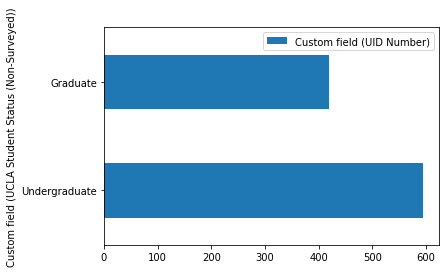

In [14]:
students.groupby(['Custom field (UCLA Student Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique().sort_values(by = 'Custom field (UID Number)', ascending = False).plot.barh()


#### Breakdown:

There are 420 unique graduate students and 594 unique undergraduate students that have checked something out from CLICC this quarter. For a total of 1014 unique UCLA students!

###  MiFi breakdown for students

In [15]:
students.groupby(['Custom field (Getting a MiFi Hotspot?)' ])[['Custom field (UID Number)']].nunique()

,Custom field (UID Number)
Custom field (Getting a MiFi Hotspot?),
No,417
Yes,629


#### Breakdown: 
417 students checked out a MiFi, and 629 students did not check out a MiFi. 

## Now lets look into the 'Custom field (Assigned Laptop/iPad Equipment)' column which records items checked out

In [16]:
students.groupby(['Custom field (Assigned Laptop/iPad Equipment)'])[['Custom field (UID Number)']].nunique().rename(columns = {'Custom field (UID Number)': '# of devices checked out'}).sort_values(by = '# of devices checked out', ascending = False)


,# of devices checked out
Custom field (Assigned Laptop/iPad Equipment),
ITS Windows Laptop,125
CLICC MacBook,112
CLICC HP Laptop,103
ITS iPad,79
CLICC ChromeBook,60
ITS MacBook,57
ITS Touchscreen Laptop,31


#### Breakdown: 
125 students checked out an ITS WIndows Laptop, and 31 students checked out an ITS Touchscreen Laptop. 

## Now lets combine the 'Custom field (Assigned Laptop/iPad Equipment)' column and the 'Custom field (Getting a MiFi Hotspot?)' to get everything checked out in one ticket together in a new column called 'Equipment&MiFi'!!!

In [17]:
x = students['Custom field (Assigned Laptop/iPad Equipment)'].astype(str)[664]
x.replace(" ", "")

'CLICCChromeBook'

In [18]:
equipmentnospace = [x.replace(" ", "") for x in students['Custom field (Assigned Laptop/iPad Equipment)'].astype(str)]
equipmentnospace
res = [i + " " + j for i, j in zip(equipmentnospace, students['Custom field (Getting a MiFi Hotspot?)'].astype(str))] 

In [19]:
students['Equipment&MiFi'] = res
students.dtypes

Creator                                              object
Custom field (UID Number)                            object
Custom field (UCLA Student Status (Non-Surveyed))    object
Custom field (Assigned Laptop/iPad Equipment)        object
Custom field (Getting a MiFi Hotspot?)               object
Custom field (Undergraduate Equipment)               object
Custom field (Graduate Equipment)                    object
Equipment&MiFi                                       object
dtype: object

In [20]:
studentsequip = students.groupby(['Custom field (UID Number)', 'Custom field (UCLA Student Status (Non-Surveyed))'])[['Equipment&MiFi']].aggregate(set).reset_index()
studentsequip

,Custom field (UID Number),Custom field (UCLA Student Status (Non-Surveyed)),Equipment&MiFi
0,003386297,Graduate,{ITSWindowsLaptop Yes}
1,003488658,Graduate,{ITSWindowsLaptop Yes}
2,003737993,Graduate,{nan Yes}
3,004212084,Graduate,"{nan Yes, ITSWindowsLaptop No}"
4,004422261,Graduate,{ITSiPad No}
...,...,...,...
1009,905623066,Undergraduate,{ITSMacBook Yes}
1010,905625173,Graduate,{nan Yes}
1011,905627445,Graduate,{nan Yes}
1012,905628548,Graduate,{nan Yes}


In [21]:
studentsequip['Equipment&MiFi'].value_counts()

{nan Yes}                                449
{ITSWindowsLaptop No}                     86
{CLICCHPLaptop No}                        76
{ITSiPad No}                              63
{CLICCMacBook No}                         54
{CLICCMacBook Yes}                        51
{CLICCChromeBook No}                      38
{ITSMacBook No}                           38
{ITSTouchscreenLaptop No}                 25
{ITSWindowsLaptop Yes}                    24
{CLICCHPLaptop Yes}                       23
{CLICCChromeBook Yes}                     19
{nan Yes, ITSWindowsLaptop No}            13
{ITSMacBook Yes}                          13
{ITSiPad Yes}                              9
{ITSTouchscreenLaptop Yes}                 5
{nan Yes, CLICCMacBook No}                 4
{nan Yes, CLICCHPLaptop No}                3
{nan Yes, CLICCChromeBook No}              3
{nan Yes, ITSMacBook No}                   2
{nan Yes, ITSiPad No}                      2
{nan No}                                   2
{ITSWindow

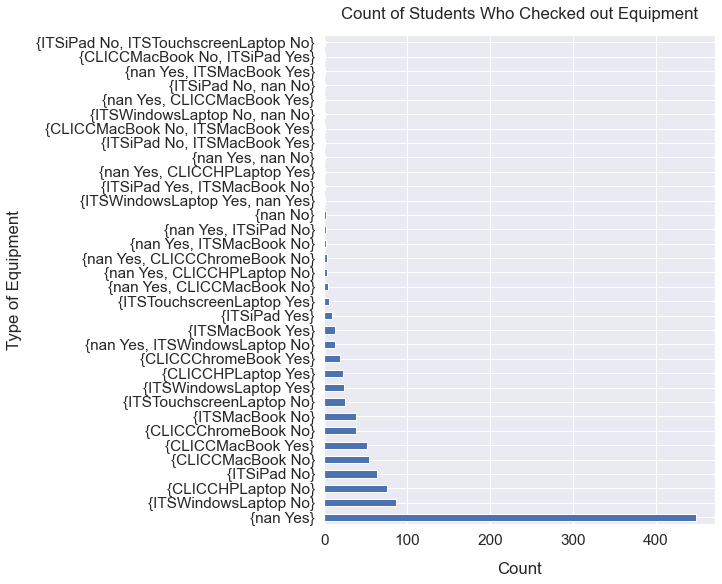

In [22]:
sns.set(font_scale=1.4)
studentsequip['Equipment&MiFi'].value_counts().plot(kind='barh', figsize=(7, 9), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("Type of Equipment", labelpad=14)
plt.title("Count of Students Who Checked out Equipment", y=1.02);

#### Breakdown:

- {nan Yes} represents MiFi
- {MacBook No} represents MacBook 
- {MacBook Yes} represents MacBook and MiFi
- {Windowslaptop No, Other Yes} represents the number of students who checked out a Windows laptop and a MiFi on separate tickets

So the most popular student check out was a MiFi hotspot (449 unique students got a MiFi), followed by a ITSWindowsLaptop, then a CLICCHPLaptop laptop, and so on.... 

## Now break it down further, into grad and undergrad students!

In [23]:
grad = studentsequip[studentsequip['Custom field (UCLA Student Status (Non-Surveyed))'] == 'Graduate']
grad

,Custom field (UID Number),Custom field (UCLA Student Status (Non-Surveyed)),Equipment&MiFi
0,003386297,Graduate,{ITSWindowsLaptop Yes}
1,003488658,Graduate,{ITSWindowsLaptop Yes}
2,003737993,Graduate,{nan Yes}
3,004212084,Graduate,"{nan Yes, ITSWindowsLaptop No}"
4,004422261,Graduate,{ITSiPad No}
...,...,...,...
993,905478129,Graduate,{nan Yes}
994,905478346,Graduate,{nan Yes}
1010,905625173,Graduate,{nan Yes}
1011,905627445,Graduate,{nan Yes}


In [24]:
grad['Equipment&MiFi'].value_counts()

{nan Yes}                                144
{ITSiPad No}                              62
{ITSWindowsLaptop No}                     60
{ITSMacBook No}                           30
{ITSTouchscreenLaptop No}                 19
{ITSWindowsLaptop Yes}                    17
{CLICCChromeBook No}                      15
{CLICCMacBook No}                         11
{ITSMacBook Yes}                          10
{ITSiPad Yes}                              8
{CLICCMacBook Yes}                         6
{CLICCChromeBook Yes}                      6
{nan Yes, ITSWindowsLaptop No}             6
{CLICCHPLaptop No}                         4
{ITSTouchscreenLaptop Yes}                 3
{CLICCHPLaptop Yes}                        2
{nan Yes, ITSiPad No}                      2
{nan Yes, ITSMacBook No}                   2
{nan Yes, CLICCChromeBook No}              2
{CLICCMacBook No, ITSiPad Yes}             1
{ITSWindowsLaptop Yes, nan Yes}            1
{nan Yes, ITSMacBook Yes}                  1
{ITSiPad Y

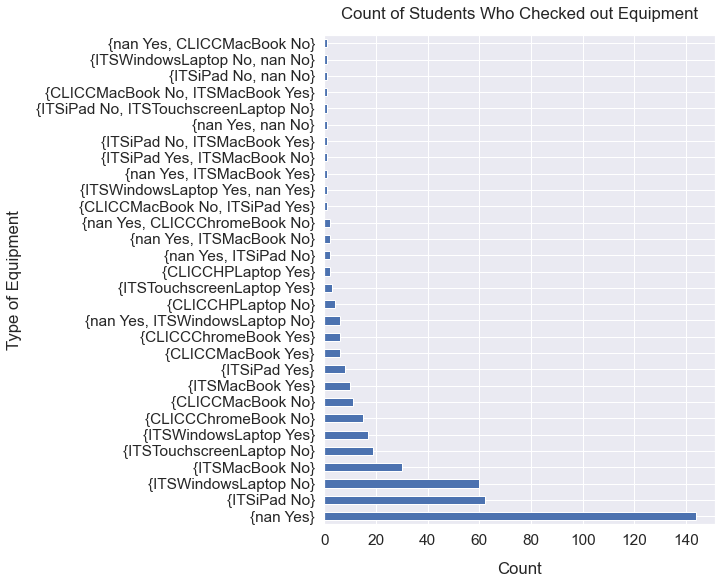

In [25]:
sns.set(font_scale=1.4)
grad['Equipment&MiFi'].value_counts().plot(kind='barh', figsize=(7, 9), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("Type of Equipment", labelpad=14)
plt.title("Count of Students Who Checked out Equipment", y=1.02);

In [26]:
undergrad = studentsequip[studentsequip['Custom field (UCLA Student Status (Non-Surveyed))'] == 'Undergraduate']
undergrad

,Custom field (UID Number),Custom field (UCLA Student Status (Non-Surveyed)),Equipment&MiFi
11,004718130,Undergraduate,{CLICCHPLaptop No}
15,004823065,Undergraduate,{ITSWindowsLaptop No}
16,004830909,Undergraduate,{nan Yes}
19,004919732,Undergraduate,{ITSTouchscreenLaptop No}
20,004931833,Undergraduate,{ITSMacBook No}
...,...,...,...
1006,905556754,Undergraduate,{ITSMacBook Yes}
1007,905584691,Undergraduate,{nan Yes}
1008,905608102,Undergraduate,{nan Yes}
1009,905623066,Undergraduate,{ITSMacBook Yes}


In [27]:
undergrad['Equipment&MiFi'].value_counts()

{nan Yes}                         305
{CLICCHPLaptop No}                 72
{CLICCMacBook Yes}                 45
{CLICCMacBook No}                  43
{ITSWindowsLaptop No}              26
{CLICCChromeBook No}               23
{CLICCHPLaptop Yes}                21
{CLICCChromeBook Yes}              13
{ITSMacBook No}                     8
{nan Yes, ITSWindowsLaptop No}      7
{ITSWindowsLaptop Yes}              7
{ITSTouchscreenLaptop No}           6
{nan Yes, CLICCHPLaptop No}         3
{ITSMacBook Yes}                    3
{nan Yes, CLICCMacBook No}          3
{nan No}                            2
{ITSTouchscreenLaptop Yes}          2
{nan Yes, CLICCChromeBook No}       1
{nan Yes, CLICCHPLaptop Yes}        1
{nan Yes, CLICCMacBook Yes}         1
{ITSiPad No}                        1
{ITSiPad Yes}                       1
Name: Equipment&MiFi, dtype: int64

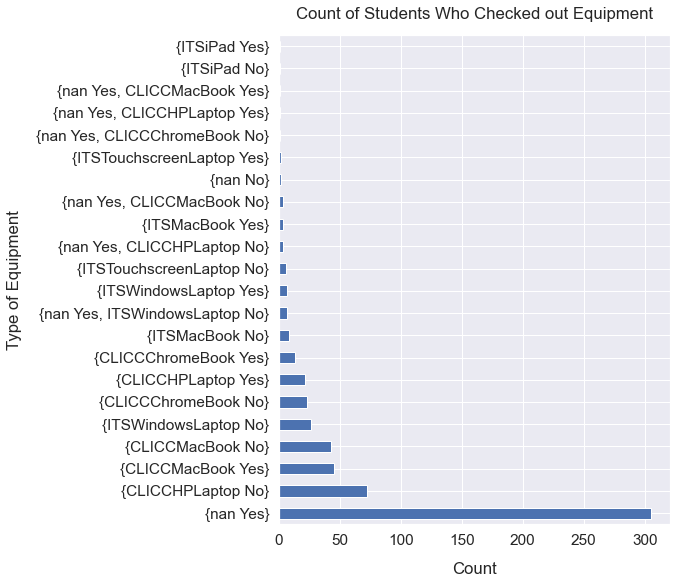

In [28]:
sns.set(font_scale=1.4)
undergrad['Equipment&MiFi'].value_counts().plot(kind='barh', figsize=(7, 9), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("Type of Equipment", labelpad=14)
plt.title("Count of Students Who Checked out Equipment", y=1.02);

# Now look at how faculty and staff used CLICC's lending services!

In [29]:
facstaff = df[~df["Custom field (UCLA Staff/Faculty Status (Non-Surveyed))"].isna()]

In [30]:
facstaff = facstaff.drop(df.columns[[3, 7, 8]], axis = 1) #drop undergraduate columns

In [31]:
facstaff.head()

,Creator,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Custom field (Faculty/Instructor Requested Equipment),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?)
16,tonyf@ucla.edu,102747898,Faculty/Instructor,Other,NaN,No
24,tuando@g.ucla.edu,903322927,Faculty/Instructor,Other,NaN,Yes
99,npasternak@g.ucla.edu,205216027,Faculty/Instructor,Macbook,ITS MacBook,Yes
106,sglasner@ucla.edu,902525515,Faculty/Instructor,Windows laptop,ITS Windows Laptop,Yes
107,sshafir@ucla.edu,602870433,Faculty/Instructor,Other,NaN,Yes


In [32]:
facstaffcount =  facstaff.groupby(['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique().sort_values(by = 'Custom field (UID Number)', ascending = False)
facstaffcount

,Custom field (UID Number)
Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),
Faculty/Instructor,29
Staff,10


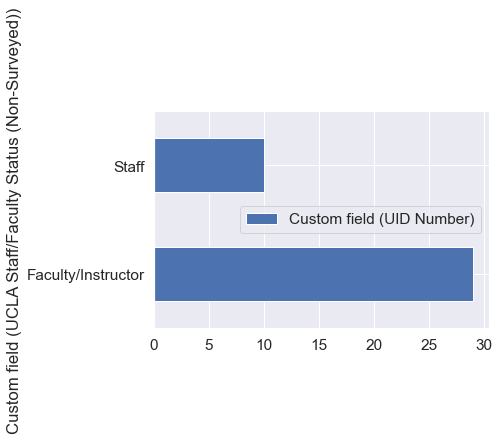

In [33]:
facstaff.groupby(['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique().sort_values(by = 'Custom field (UID Number)', ascending = False).plot.barh()


### Combine the 'Custom field (Assigned Laptop/iPad Equipment)' columns and 'Custom field (Getting a MiFi Hotspot?)' column to get everything checked out in a single ticket

In [34]:
equipmentnospace = [x.replace(" ", "") for x in facstaff['Custom field (Assigned Laptop/iPad Equipment)'].astype(str)]
equipmentnospace
res = [i + " " + j for i, j in zip(equipmentnospace, facstaff['Custom field (Getting a MiFi Hotspot?)'].astype(str))] 

In [35]:
facstaff['Equipment&MiFi'] = res
facstaff.dtypes

Creator                                                    object
Custom field (UID Number)                                  object
Custom field (UCLA Staff/Faculty Status (Non-Surveyed))    object
Custom field (Faculty/Instructor Requested Equipment)      object
Custom field (Assigned Laptop/iPad Equipment)              object
Custom field (Getting a MiFi Hotspot?)                     object
Equipment&MiFi                                             object
dtype: object

In [36]:
facstaffcheckout = facstaff.groupby(['Custom field (UID Number)'])[['Equipment&MiFi']].aggregate(list).reset_index()#['Equipment&MiFi'].value_counts()
facstaffcheckout.head()
# see what each person checked out

,Custom field (UID Number),Equipment&MiFi
0,002556182,[ITSWindowsLaptop No]
1,002620239,[ITSWindowsLaptop No]
2,003614708,[ITSTouchscreenLaptop No]
3,005647080,"[nan Yes, CLICCMacBook No]"
4,100650831,[ITSTouchscreenLaptop No]


In [37]:
facstaffcheckout.shape

(39, 2)

In [38]:
facstaffcheckout['Equipment&MiFi'].value_counts()

[nan Yes]                     9
[ITSWindowsLaptop No]         8
[ITSiPad No]                  8
[ITSMacBook No]               6
[ITSTouchscreenLaptop No]     4
[ITSWindowsLaptop Yes]        1
[nan No]                      1
[nan Yes, CLICCMacBook No]    1
[ITSMacBook Yes]              1
Name: Equipment&MiFi, dtype: int64

## Accurate list of items checked out by faculty & staff!

#### Breakdown:

Here we see the 39 unique staff and faculty member check outs, with the numbers indicating how many people  made that specific checkout. 

- [nan Yes] represents MiFi
- [ITSiPad No] represents iPad and No MiFi
- [ITSMacBook No] represents MacBook and No MiFi
- [ITSMacBook Yes] represents MacBook and MiFi
- [nan Yes, CLICCMacbook No] represents one staff or faculty member who checked out a MiFi on one  ticket and then  another MacBook on  its own  ticket

So the most popular staff/faculty check out was just a MiFi, followed by just an iPad, followed by just a MacBook, then just a Windows laptop, and so on.... 

In [39]:
facstaffcheckout = facstaff.groupby(['Custom field (UID Number)', 'Custom field (UCLA Staff/Faculty Status (Non-Surveyed))' ])[['Equipment&MiFi']].aggregate(set).reset_index()
facstaffcheckout

,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Equipment&MiFi
0,002556182,Faculty/Instructor,{ITSWindowsLaptop No}
1,002620239,Staff,{ITSWindowsLaptop No}
2,003614708,Staff,{ITSTouchscreenLaptop No}
3,005647080,Faculty/Instructor,"{nan Yes, CLICCMacBook No}"
4,100650831,Staff,{ITSTouchscreenLaptop No}
5,102743819,Faculty/Instructor,{nan Yes}
6,102747898,Faculty/Instructor,{nan No}
7,103138711,Staff,{ITSWindowsLaptop No}
8,105470033,Staff,{ITSWindowsLaptop No}
9,105657196,Faculty/Instructor,{ITSMacBook No}


In [40]:
faculty = facstaffcheckout[facstaffcheckout['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))'] == 'Faculty/Instructor']
faculty.head()

,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Equipment&MiFi
0,002556182,Faculty/Instructor,{ITSWindowsLaptop No}
3,005647080,Faculty/Instructor,"{nan Yes, CLICCMacBook No}"
5,102743819,Faculty/Instructor,{nan Yes}
6,102747898,Faculty/Instructor,{nan No}
9,105657196,Faculty/Instructor,{ITSMacBook No}


In [41]:
faculty['Equipment&MiFi'].value_counts()

{nan Yes}                     9
{ITSiPad No}                  8
{ITSMacBook No}               6
{ITSWindowsLaptop No}         2
{nan Yes, CLICCMacBook No}    1
{ITSMacBook Yes}              1
{nan No}                      1
{ITSWindowsLaptop Yes}        1
Name: Equipment&MiFi, dtype: int64

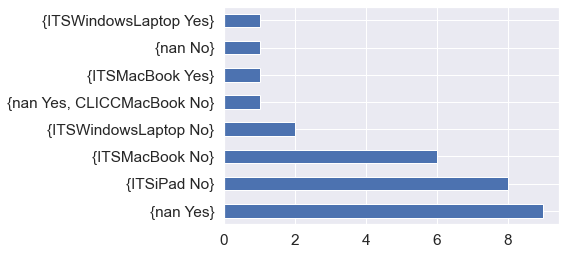

In [42]:
faculty['Equipment&MiFi'].value_counts().plot.barh()

In [43]:
staff = facstaffcheckout[facstaffcheckout['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))'] == 'Staff']
staff.head()

,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Equipment&MiFi
1,002620239,Staff,{ITSWindowsLaptop No}
2,003614708,Staff,{ITSTouchscreenLaptop No}
4,100650831,Staff,{ITSTouchscreenLaptop No}
7,103138711,Staff,{ITSWindowsLaptop No}
8,105470033,Staff,{ITSWindowsLaptop No}


In [44]:
staff['Equipment&MiFi'].value_counts()

{ITSWindowsLaptop No}        6
{ITSTouchscreenLaptop No}    4
Name: Equipment&MiFi, dtype: int64

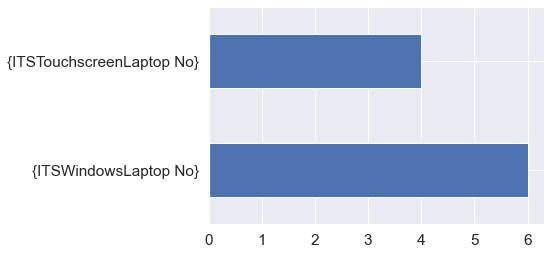

In [45]:
staff['Equipment&MiFi'].value_counts().plot.barh()